In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium import plugins
import datetime as dt
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, YearLocator
import datetime as dt

%matplotlib inline 
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [2]:
# for style in plt.style.available:
#     print(style)
#     plt.style.use(style)
#     plt.scatter([1,2,3],[4,5,6])
#     plt.show()
#     plt.barh([1,2,3],[4,5,6])
#     plt.show()

In [3]:
MESI = ['gen','feb','mar','apr','mag','giu','lug','ago','set','ott','nov','dic']

# Import data

In [4]:
df = pd.read_csv('data/incidenti_2007_2017.csv')

In [5]:
df = df[df['DataOraIncidente_year']!=2017].copy()

In [6]:
df.head()

,Chilometrica,CondizioneAtmosferica,Confermato,DaSpecificare,DataOraIncidente,FondoStradale,Gruppo,ID,Illuminazione,Latitudine,Localizzazione1,Localizzazione2,Longitudine,NUM_FERITI,NUM_ILLESI,NUM_MORTI,NUM_RISERVATA,NaturaIncidente,ParticolaritaStrade,Pavimentazione,Segnaletica,Strada02,Strada1,Strada2,TipoStrada,Traffico,Visibilita,DataOraIncidente_date,DataOraIncidente_time,DataOraIncidente_time_h,DataOraIncidente_weekday,DataOraIncidente_month,DataOraIncidente_year
0,151-153,Nuvoloso,1.0,NaN,2007-01-01 00:00:00,Asciutto,18,1707637,Sufficiente,NaN,Strada Urbana,in prossimità,NaN,0,0,0,0,Veicolo in marcia contro veicolo in sosta,Rettilineo,Asfaltata,Verticale ed orizzontale,del civico n.,VIA ANASTASIO II,NaN,Due carreggiate,Normale,Buona,2007-01-01,00:00:00,0,0,1,2007
1,537,Nuvoloso,1.0,NaN,2007-01-01 00:40:00,Asciutto,4,1708657,Sufficiente,NaN,Provinciale entro l'abitato,in prossimità,NaN,2,9,0,0,Tamponamento Multiplo,Rettilineo,Asfaltata,Verticale ed orizzontale,del civico n.,VIA NOMENTANA,NaN,Più di due carreggiate,Normale,Buona,2007-01-01,00:40:00,0,0,1,2007
2,123/A,Pioggia in atto,1.0,NaN,2007-01-01 01:10:00,Bagnato (pioggia),18,1707214,Sufficiente,NaN,Strada Urbana,in prossimità,NaN,1,2,0,0,Scontro frontale/laterale DX fra veicoli in ma...,Rettilineo,Asfaltata,Orizzontale,del civico n.,VIA MATTIA BATTISTINI,NaN,Una carreggiata a doppio senso,Normale,Buona,2007-01-01,01:10:00,1,0,1,2007
3,13,Nebbia,0.0,NaN,2007-01-01 01:30:00,Bagnato (umidità in atto),5,1707689,Sufficiente,NaN,Strada Urbana,in prossimità,NaN,0,1,0,0,Veicolo in marcia contro veicoli fermi,Rettilineo,Asfaltata,Verticale,del civico n.,VIA CESARE DE LOLLIS,NaN,Una carreggiata a senso unico di marcia,Normale,Sufficiente,2007-01-01,01:30:00,1,0,1,2007
4,NaN,Nuvoloso,1.0,NaN,2007-01-01 01:30:00,Asciutto,16,1708159,Sufficiente,NaN,Strada Urbana,all'intersezione con,NaN,0,2,0,0,Scontro frontale/laterale SX fra veicoli in ma...,Incrocio,In cubetti di porfido,Verticale ed orizzontale,VIA RAFFAELLO GIOVAGNOLI,VIALE DEI QUATTRO VENTI,VIA RAFFAELLO GIOVAGNOLI,Una carreggiata a doppio senso,Normale,Buona,2007-01-01,01:30:00,1,0,1,2007


In [7]:
len(df)

344040

In [8]:
df['DataOraIncidente'] = df['DataOraIncidente'].apply(lambda d: pd.to_datetime(d))

# Incidenti per anno

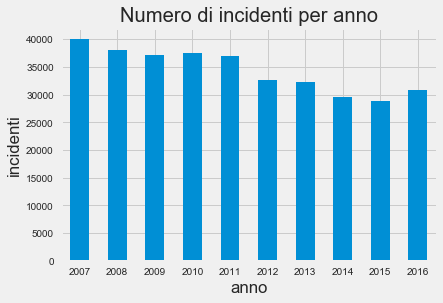

In [9]:
# ax1 = df.groupby('DataOraIncidente')\
#   .count()[['ID']]\
#   .resample('A')\
#   .sum()\
#   .plot(marker='o')

df.groupby('DataOraIncidente')\
  .count()[['ID']]\
  .resample('A')\
  .sum()\
  .plot(kind='bar')

plt.ylabel('incidenti')
plt.xlabel('anno')
plt.title('Numero di incidenti per anno')
plt.xticks(range(10),range(2007,2018), rotation=0)
plt.legend().set_visible(False)
plt.show()

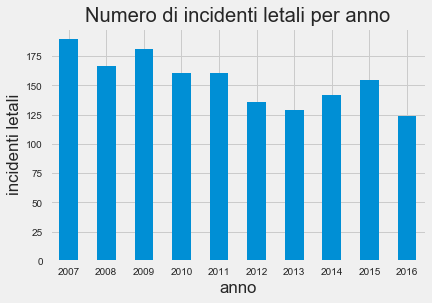

In [10]:
df[df['NUM_MORTI']>0].groupby('DataOraIncidente')\
  .count()[['NUM_MORTI']]\
  .resample('A')\
  .sum()\
  .plot(kind='bar')

plt.ylabel('incidenti letali')
plt.xlabel('anno')
plt.title('Numero di incidenti letali per anno')
plt.xticks(range(10),range(2007,2018), rotation=0)
plt.legend().set_visible(False)
plt.show()

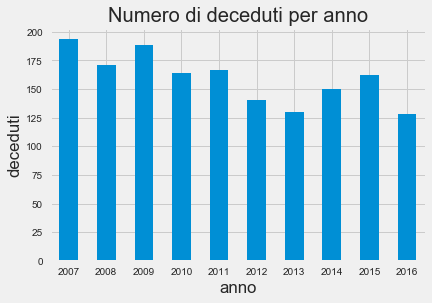

In [11]:
df.groupby('DataOraIncidente')\
  .sum()[['NUM_MORTI']]\
  .resample('A')\
  .sum()\
  .plot(kind='bar')

plt.ylabel('deceduti')
plt.xlabel('anno')
plt.title('Numero di deceduti per anno')
plt.xticks(range(10),range(2007,2018), rotation=0)
plt.legend().set_visible(False)
plt.show()

# Orario

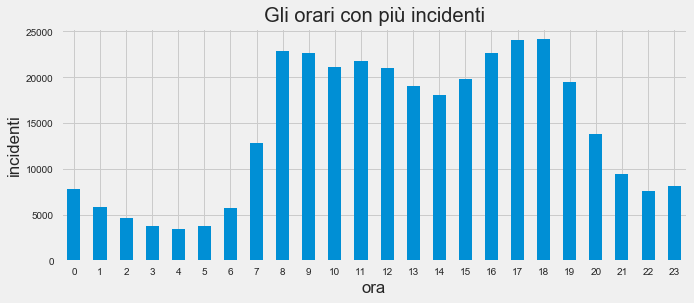

In [12]:
df.groupby('DataOraIncidente_time_h').count()[['ID']].plot(kind='bar',figsize=(10,4))
plt.ylabel('incidenti')
plt.xlabel('ora')
plt.title('Gli orari con più incidenti')
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

In [13]:
# df.groupby('DataOraIncidente_time_h').sum()[['NUM_MORTI']].plot(kind='bar', figsize=(10,4))
# plt.ylabel('deceduti')
# plt.xlabel('ora')
# plt.title('Gli orari piu pericolosi - deceduti')
# plt.xticks(rotation=0)
# plt.legend().set_visible(False)
# plt.show()

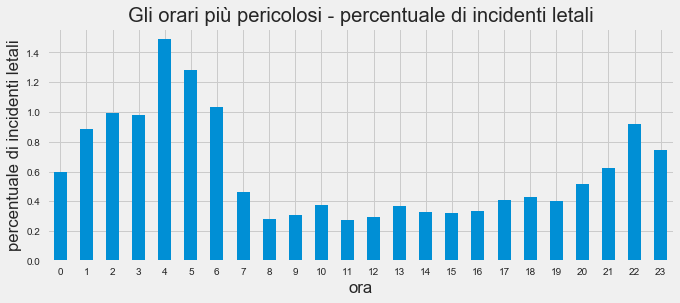

In [14]:
inc_deceduti = df[df['NUM_MORTI']>0].groupby('DataOraIncidente_time_h')\
                                    .count()[['ID']]\
                                    .rename(columns={'ID':'incidenti_deceduti'})
inc = df.groupby('DataOraIncidente_time_h')\
        .count()[['ID']]\
        .rename(columns={'ID':'incidenti'})
df_temp = pd.merge(inc,inc_deceduti,left_index=True,right_index=True)
df_temp['incidenti_deceduti_%'] =  100*df_temp['incidenti_deceduti'] / df_temp['incidenti']
df_temp['incidenti_deceduti_%'].plot(kind='bar', figsize=(10,4))
plt.ylabel('percentuale di incidenti letali')
plt.xlabel('ora')
plt.title('Gli orari più pericolosi - percentuale di incidenti letali')
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

# Incidenti giornalieri

#### Totale incidenti

In [15]:
# data2incidenti = df.groupby('DataOraIncidente_date').count()[['ID']]
# ts = pd.Series(data2incidenti['ID'].values, 
#                index=pd.to_datetime(data2incidenti.index))

# fig, ax = plt.subplots(1)
# fig.set_size_inches((16,5))
# ax.plot(ts)

# months = MonthLocator(range(1, 13), bymonthday=1, interval=4)
# monthsFmt = DateFormatter("%b %Y")
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(monthsFmt)
# plt.xticks(rotation=60)
# plt.title('Numero di incidenti giornalieri - totale incidenti')
# plt.ylabel('incidenti')
# plt.xlabel('data')
# plt.show()

#### Percentuale di incidenti con deceduti

In [16]:
# inc_deceduti = df[df['NUM_MORTI']>0].groupby('DataOraIncidente_date')\
#                                     .count()[['ID']]\
#                                     .rename(columns={'ID':'incidenti_deceduti'})
# inc = df.groupby('DataOraIncidente_date')\
#         .count()[['ID']]\
#         .rename(columns={'ID':'incidenti'})
# df_temp = pd.merge(inc,inc_deceduti,left_index=True,right_index=True)
# df_temp['incidenti_deceduti_%'] =  100*df_temp['incidenti_deceduti'] / df_temp['incidenti']

In [17]:
# ts = pd.Series(df_temp['incidenti_deceduti_%'].values, 
#                index=pd.to_datetime(df_temp.index))

# fig, ax = plt.subplots(1)
# fig.set_size_inches((16,5))
# ax.plot(ts)

# months = MonthLocator(range(1, 13), bymonthday=1, interval=4)
# monthsFmt = DateFormatter("%b %Y")
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(monthsFmt)
# plt.xticks(rotation=60)
# plt.title('Percentuale di incidenti con deceduti')
# plt.ylabel('percentuale di incidenti con deceduti')
# plt.xlabel('data')
# plt.show()

In [18]:
# ts.head()
# df_temp = pd.DataFrame()
# df_temp['date'] = ts.index
# df_temp['values'] = ts.values
# df_temp['year'] = df_temp['date'].apply(lambda x: pd.to_datetime(x).year)

# plt.figure(1,figsize=(16,10))
# i=1
# f, axies = plt.subplots(10, 1, sharey=True)
# for year in sorted(set(df_temp.year.values)):
#     df_temp_y = df_temp[df_temp.year==year].copy().set_index('date')[['values']]
#     df_temp_y.plot(ax=axies[i-1], legend=False, figsize=(10,30))
#     #plt.title('Numero di incidenti giornalieri - totale incidenti')
#     plt.ylabel('')
#     plt.xlabel('')
#     i+=1
# plt.show() 

In [19]:
# data2incidenti = df.groupby('DataOraIncidente_date').sum()[['NUM_MORTI']]
# ts = pd.Series(data2incidenti['NUM_MORTI'].values, 
#                index=pd.to_datetime(data2incidenti.index))

# fig, ax = plt.subplots(1)
# fig.set_size_inches((16,5))
# ax.plot(ts)

# months = MonthLocator(range(1, 13), bymonthday=1, interval=4)
# monthsFmt = DateFormatter("%b %Y")
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(monthsFmt)
# plt.xticks(rotation=60)
# plt.title('Numero di deceduti - incidenti con deceduti')
# plt.ylabel('deceduti')
# plt.xlabel('data')
# plt.show()

# Incidenti per mese

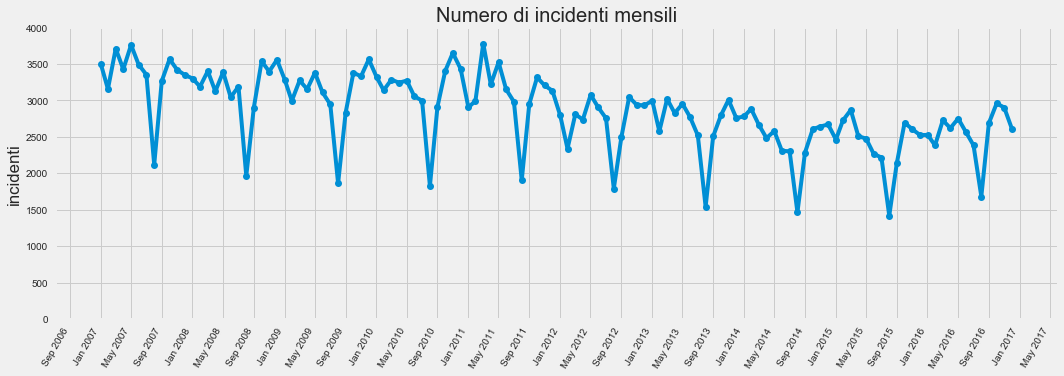

In [36]:
data2incidenti = df.groupby('DataOraIncidente_date').count()[['ID']]
ts = pd.Series(data2incidenti['ID'].values, 
               index=pd.to_datetime(data2incidenti.index))
ts = ts.resample('1M').sum()

fig, ax = plt.subplots(1)
fig.set_size_inches((16,5))
ax.plot(ts, marker='o')
#ax.bar(ts)

months = MonthLocator(range(1, 12+1), bymonthday=30, interval=4)
monthsFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xticks(rotation=60, ha='right')

#ax.axis(xmin = -0.5)

plt.title('Numero di incidenti mensili')
plt.ylabel('incidenti')
#plt.xlabel('data')
plt.ylim(0,4000)
plt.show()

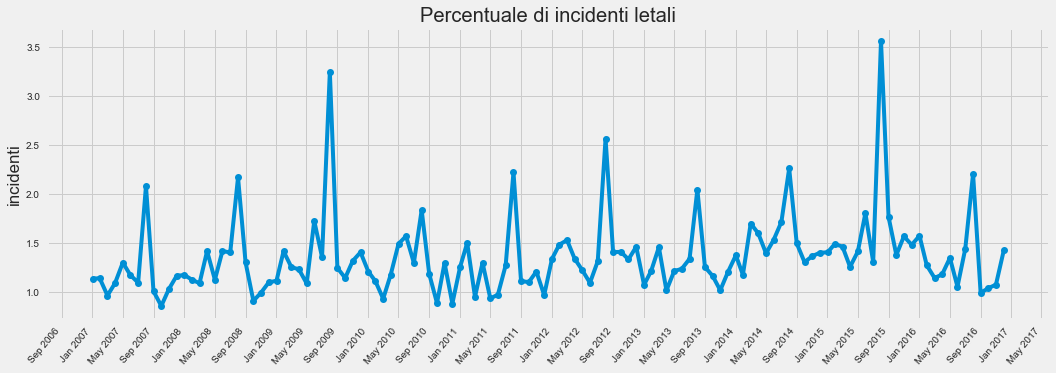

In [43]:
inc_deceduti = df[df['NUM_MORTI']>0].groupby('DataOraIncidente_date')\
                                    .count()[['ID']]\
                                    .rename(columns={'ID':'incidenti_deceduti'})
inc = df.groupby('DataOraIncidente_date')\
        .count()[['ID']]\
        .rename(columns={'ID':'incidenti'})
df_temp = pd.merge(inc,inc_deceduti,left_index=True,right_index=True)
df_temp.index = pd.DatetimeIndex(df_temp.index)
df_temp = df_temp.resample('M').sum()
df_temp['incidenti_deceduti_%'] =  100*df_temp['incidenti_deceduti'] / df_temp['incidenti']

#data2incidenti = df.groupby('DataOraIncidente_date').count()[['ID']]
ts = pd.Series(df_temp['incidenti_deceduti_%'].values, 
               index=pd.to_datetime(df_temp.index))
#ts = ts.resample('1M').sum()

fig, ax = plt.subplots(1)
fig.set_size_inches((16,5))
ax.plot(ts, marker='o')
#ax.bar(ts)

months = MonthLocator(range(1, 12+1), bymonthday=30, interval=4)
monthsFmt = DateFormatter("%b %Y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
plt.xticks(rotation=50, ha='right')

#ax.axis(xmin = -0.5)

plt.title('Percentuale di incidenti letali')
plt.ylabel('incidenti')
#plt.xlabel('data')
#plt.ylim(0,100)
plt.show()

# Mesi piu pericolosi

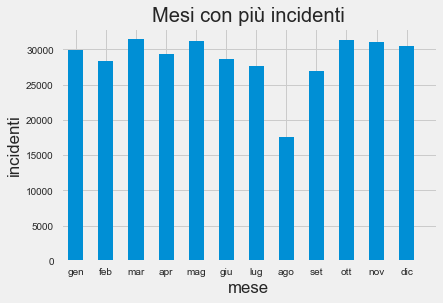

In [23]:
df.groupby('DataOraIncidente_month')\
        .count()[['ID']]\
        .rename(columns={'ID':'incidenti'}).plot(kind="bar")
        
plt.xticks(range(0,12+1),MESI)
plt.ylabel('incidenti')
plt.xlabel('mese')
plt.title('Mesi con più incidenti')
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

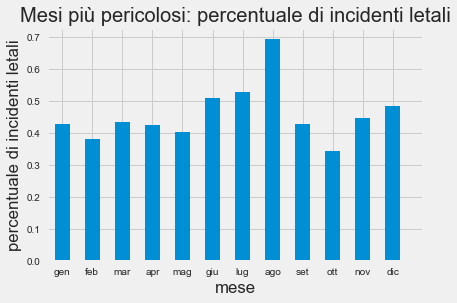

In [24]:
inc_deceduti = df[df['NUM_MORTI']>0].groupby('DataOraIncidente_month')\
                                    .count()[['ID']]\
                                    .rename(columns={'ID':'incidenti_deceduti'})
inc = df.groupby('DataOraIncidente_month')\
        .count()[['ID']]\
        .rename(columns={'ID':'incidenti'})
df_temp = pd.merge(inc,inc_deceduti,left_index=True,right_index=True)
df_temp['incidenti_deceduti_%'] =  100*df_temp['incidenti_deceduti'] / df_temp['incidenti']
df_temp['incidenti_deceduti_%'].plot(kind='bar', figsize=(6,4))
plt.xticks(range(0,12+1),MESI)
plt.ylabel('percentuale di incidenti letali')
plt.xlabel('mese')
plt.title('Mesi più pericolosi: percentuale di incidenti letali')
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.show()

# Weekday

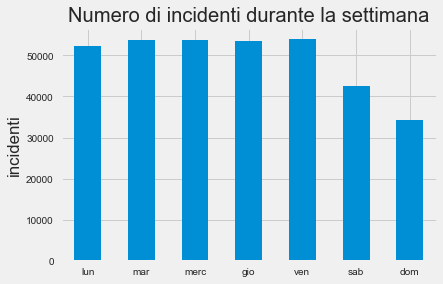

In [25]:
df.groupby('DataOraIncidente_weekday').count()[['ID']].plot(kind='bar')

plt.xticks(range(0,7), 
           ['lun','mar','merc','gio','ven','sab','dom'],
           rotation=0)

plt.legend().set_visible(False)
plt.xticks(rotation=0)
plt.title('Numero di incidenti durante la settimana')
plt.ylabel('incidenti')
plt.xlabel('')
plt.show()

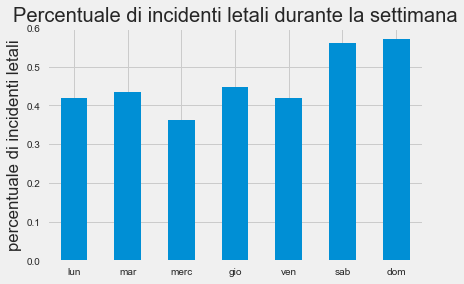

In [26]:
inc_deceduti = df[df['NUM_MORTI']>0].groupby('DataOraIncidente_weekday')\
                                    .count()[['ID']]\
                                    .rename(columns={'ID':'incidenti_deceduti'})
inc = df.groupby('DataOraIncidente_weekday')\
        .count()[['ID']]\
        .rename(columns={'ID':'incidenti'})
df_temp = pd.merge(inc,inc_deceduti,left_index=True,right_index=True)
df_temp['incidenti_deceduti_%'] =  100*df_temp['incidenti_deceduti'] / df_temp['incidenti']
df_temp['incidenti_deceduti_%'].plot(kind='bar', figsize=(6,4))



#df.groupby('DataOraIncidente_weekday').count()[['ID']].plot(kind='bar')


plt.xticks(range(0,7), 
           ['lun','mar','merc','gio','ven','sab','dom'],
           rotation=0)

plt.legend().set_visible(False)
plt.xticks(rotation=0)
plt.title('Percentuale di incidenti letali durante la settimana')
plt.ylabel('percentuale di incidenti letali')
plt.xlabel('')
plt.show()

In [27]:
# df.groupby('DataOraIncidente_weekday').sum()[['NUM_MORTI']].plot(kind='bar')

# plt.xticks(range(0,7), 
#            ['lun','mar','merc','gio','ven','sab','dom'],
#            rotation=0)

# plt.legend().set_visible(False)
# plt.xticks(rotation=0)
# plt.title('Numero di deceduti durante la settimana')
# plt.ylabel('deceduti')
# #plt.xlabel('data')
# plt.show()

# Mese + anno

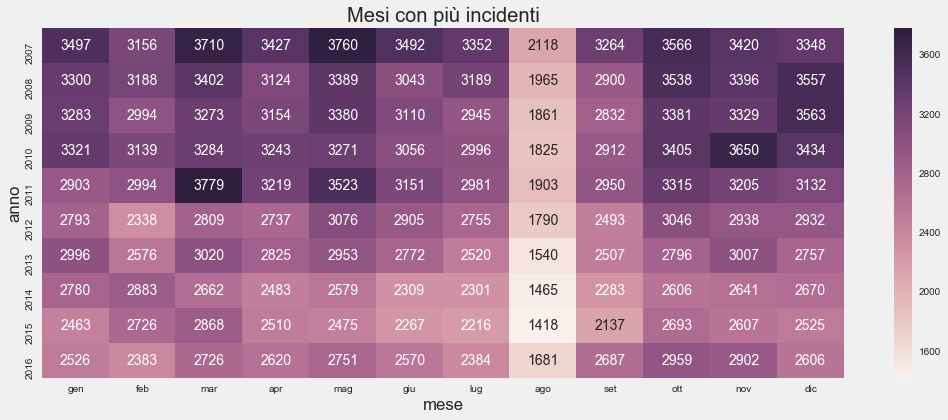

In [54]:
plt.figure(figsize=(16,6))

sns.heatmap(
    df.groupby(['DataOraIncidente_year', 'DataOraIncidente_month'])\
    .count()[['ID']]\
    .reset_index().pivot('DataOraIncidente_year', 'DataOraIncidente_month', 'ID'),
    annot=True, fmt="d"
)
# plt.yticks([7-i-0.5 for i in range(0,7)], 
#            ['lunedi','martedi','mercoledi','giovedi','venerdi','sabato','domenica'],
#            rotation=0)

# plt.xticks([x for x in range(0,24)],
#            ['0{}:00-0{}:59'.format(x,x) if x<10 else '{}:00-{}:59'.format(x,x) for x in range(0,24) ],
#            rotation=60)

plt.xticks(np.arange(0+0.5,12), MESI, ha='center')

plt.title('Mesi con più incidenti')
plt.ylabel('anno')
plt.xlabel('mese')
plt.show()

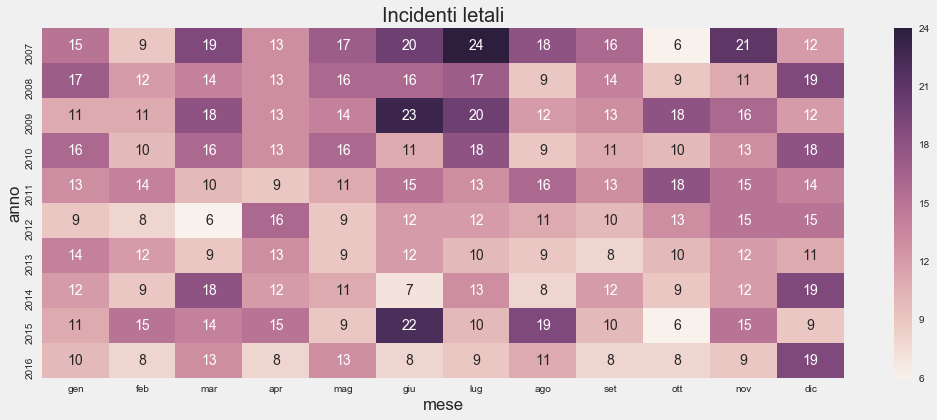

In [53]:
plt.figure(figsize=(16,6))

sns.heatmap(
    df[df['NUM_MORTI']>0].groupby(['DataOraIncidente_year', 'DataOraIncidente_month'])\
    .count()[['ID']]\
    .reset_index().pivot('DataOraIncidente_year', 'DataOraIncidente_month', 'ID'),
    annot=True, fmt="d"
)
# plt.yticks([7-i-0.5 for i in range(0,7)], 
#            ['lunedi','martedi','mercoledi','giovedi','venerdi','sabato','domenica'],
#            rotation=0)

# plt.xticks([x for x in range(0,24)],
#            ['0{}:00-0{}:59'.format(x,x) if x<10 else '{}:00-{}:59'.format(x,x) for x in range(0,24) ],
#            rotation=60)
plt.xticks(np.arange(0+0.5,12), MESI, ha='center')

plt.title('Incidenti letali')
plt.ylabel('anno')
plt.xlabel('mese')
plt.show()

# Weekday + hour

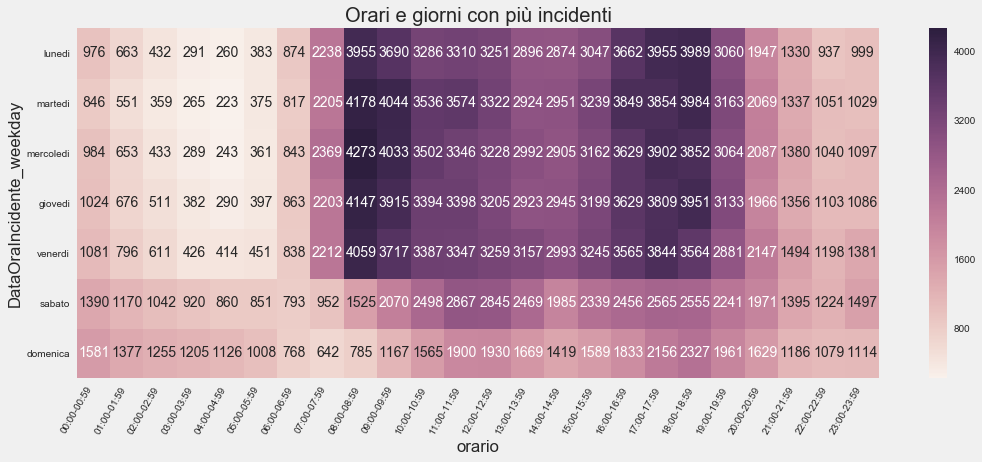

In [55]:
plt.figure(figsize=(16,6))

sns.heatmap(
    df.groupby(["DataOraIncidente_weekday", "DataOraIncidente_time_h"])\
    .count()[['ID']]\
    .reset_index().pivot("DataOraIncidente_weekday", "DataOraIncidente_time_h", 'ID'),
    annot=True, fmt="d"
)
plt.yticks([7-i-0.5 for i in range(0,7)], 
           ['lunedi','martedi','mercoledi','giovedi','venerdi','sabato','domenica'],
           rotation=0)

plt.xticks([x for x in range(0,24)],
           ['0{}:00-0{}:59'.format(x,x) if x<10 else '{}:00-{}:59'.format(x,x) for x in range(0,24) ],
           rotation=60)

plt.title('Orari e giorni con più incidenti')
plt.xlabel('orario')
plt.show()

In [31]:
# inc_deceduti = df[df['NUM_MORTI']>0].groupby(["DataOraIncidente_weekday", "DataOraIncidente_time_h"])\
#                                     .count()[['ID']]\
#                                     .rename(columns={'ID':'incidenti_deceduti'})
# inc = df.groupby(["DataOraIncidente_weekday", "DataOraIncidente_time_h"])\
#         .count()[['ID']]\
#         .rename(columns={'ID':'incidenti'})
# df_temp = pd.merge(inc,inc_deceduti,left_index=True,right_index=True)
# df_temp['incidenti_deceduti_%'] =  np.round(100*df_temp['incidenti_deceduti'] / df_temp['incidenti'], 2)
# df_temp = df_temp.reset_index().pivot("DataOraIncidente_weekday", "DataOraIncidente_time_h", 'incidenti_deceduti_%')

In [32]:
# plt.figure(figsize=(16,6))

# sns.heatmap(df_temp,annot=True, fmt="g")
# plt.yticks([7-i-0.5 for i in range(0,7)], 
#            ['lunedi','martedi','mercoledi','giovedi','venerdi','sabato','domenica'],
#            rotation=0)

# plt.xticks([x for x in range(0,24)],
#            ['0{}:00-0{}:59'.format(x,x) if x<10 else '{}:00-{}:59'.format(x,x) for x in range(0,24) ],
#            rotation=60)

# plt.title('Orari e giorni piu pericolosi - incidenti')
# plt.xlabel('orario')
# plt.ylabel('percentuale incidenti letali')
# plt.show()

In [33]:
# plt.figure(figsize=(16,6))

# df_temp = df[df['NUM_MORTI']>0].groupby(['DataOraIncidente_weekday', 
#                                    'DataOraIncidente_time_h'])\
#                          .count()[['NUM_MORTI']]\
#                          .reset_index().pivot('DataOraIncidente_weekday', 
#                                               'DataOraIncidente_time_h', 
#                                               'NUM_MORTI')

# sns.heatmap(df_temp,annot=True, fmt='d')
# plt.yticks([7-i-0.5 for i in range(0,7)], 
#            ['lunedi','martedi','mercoledi','giovedi','venerdi','sabato','domenica'],
#            rotation=0)

# plt.xticks([x for x in range(0,24)],
#            ['0{}:00-0{}:59'.format(x,x) if x<10 else '{}:00-{}:59'.format(x,x) for x in range(0,24) ],
#            rotation=60)

# plt.title('Orari e giorni piu pericolosi - incidenti con deceduti')
# plt.xlabel('orario')
# plt.show()

In [34]:
# df['DataOraIncidente_time_h2'] = df['DataOraIncidente_time_h'].apply(lambda x: x-x%2)
# df['DataOraIncidente_time_h4'] = df['DataOraIncidente_time_h'].apply(lambda x: x-x%4)

# df_temp = df[df['NUM_MORTI']>0].groupby(['DataOraIncidente_weekday', 
#                                    'DataOraIncidente_time_h4'])\
#                          .count()[['NUM_MORTI']]\
#                          .reset_index().pivot('DataOraIncidente_weekday', 
#                                               'DataOraIncidente_time_h4', 
#                                               'NUM_MORTI')
# plt.figure(figsize=(16,6))
# sns.heatmap(df_temp,annot=True, fmt='d')
# plt.yticks([7-i-0.5 for i in range(0,7)], 
#            ['lunedi','martedi','mercoledi','giovedi','venerdi','sabato','domenica'],
#            rotation=0)

# plt.xticks([x+0.3 for x in range(0,6)],
#            ['0{}:00-0{}:59'.format(x,x+3) if x<10 else '{}:00-{}:59'.format(x,x+3) for x in range(0,24,4) ],
#            rotation=60)

# plt.title('Orari e giorni piu pericolosi - incidenti con deceduti')
# plt.xlabel('orario')
# plt.show()

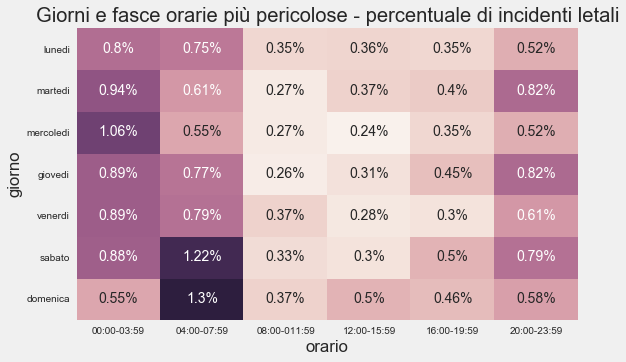

In [57]:
df['DataOraIncidente_time_h4'] = df['DataOraIncidente_time_h'].apply(lambda x: x-x%4)

inc_deceduti = df[df['NUM_MORTI']>0].groupby(["DataOraIncidente_weekday", 
                                              "DataOraIncidente_time_h4"])\
                                    .count()[['ID']]\
                                    .rename(columns={'ID':'incidenti_deceduti'})
inc = df.groupby(["DataOraIncidente_weekday", "DataOraIncidente_time_h4"])\
        .count()[['ID']]\
        .rename(columns={'ID':'incidenti'})
df_temp = pd.merge(inc,inc_deceduti,left_index=True,right_index=True)
df_temp['incidenti_deceduti_%'] =  np.round(100*df_temp['incidenti_deceduti'] / df_temp['incidenti'], 2)
df_temp = df_temp.reset_index().pivot("DataOraIncidente_weekday", 
                                      "DataOraIncidente_time_h4", 
                                      'incidenti_deceduti_%')



plt.figure(figsize=(8,5))

labels = np.array([np.array([str(el)+'%' for el in row]) for row in df_temp.values])
sns.heatmap(df_temp,annot=labels, fmt='',cbar=False)#, cmap="red")
plt.yticks([7-i-0.5 for i in range(0,7)], 
           ['lunedi','martedi','mercoledi','giovedi','venerdi','sabato','domenica'],
           rotation=0)

plt.xticks([x+0.5 for x in range(0,6)],
           ['0{}:00-0{}:59'.format(x,x+3) if x<10 else '{}:00-{}:59'.format(x,x+3) for x in range(0,24,4) ],
           rotation=0)

plt.title('Giorni e fasce orarie più pericolose - percentuale di incidenti letali')
plt.xlabel('orario')
plt.ylabel('giorno')
plt.show()

# Nth day of the year

In [58]:
def get_nth(year,month,day):
    return (dt.date(year, month, day) - dt.date(year,1,1)).days + 1

df['day_of_year'] = df['DataOraIncidente'].apply(lambda x: get_nth(x.year,x.month,x.day))

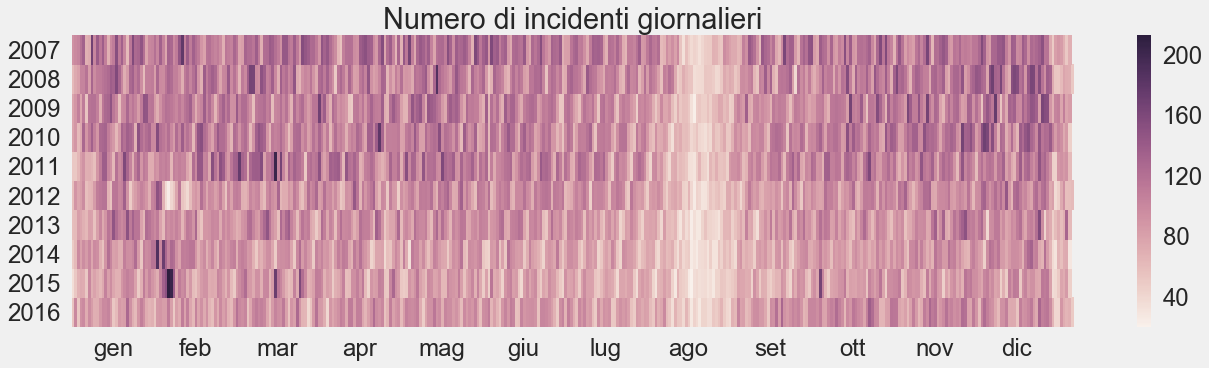

In [62]:
plt.figure(figsize=(20,5))
sns.heatmap(
    df.groupby(['DataOraIncidente_year','day_of_year'])\
      .count()['ID']\
      .reset_index()\
      .pivot('DataOraIncidente_year','day_of_year','ID'))

plt.xticks(range(15,366,30),
           ['gen','feb','mar','apr','mag','giu','lug','ago','set','ott','nov','dic'],
           rotation=0)

plt.title('Numero di incidenti giornalieri')
plt.xlabel('')
plt.ylabel('')
plt.show()

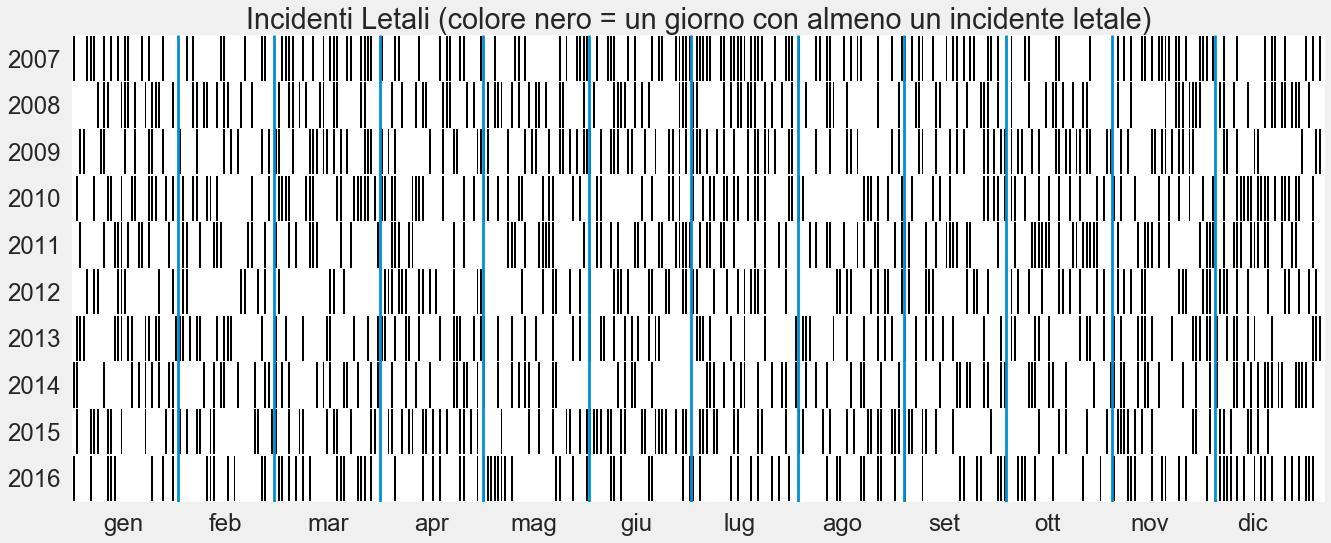

In [63]:
plt.figure(figsize=(20,8))

df_temp = df.groupby(['DataOraIncidente_year','day_of_year'])\
            .sum()[['NUM_MORTI']]\
            .reset_index()\
            .pivot('DataOraIncidente_year','day_of_year','NUM_MORTI')
df_temp = (df_temp>=1).astype(int)
sns.set_context("poster",font_scale=1.5)
sns.heatmap(df_temp,cbar=False, cmap="binary", linewidths=.5)

plt.xticks(range(15,366,30),
           ['gen','feb','mar','apr','mag','giu','lug','ago','set','ott','nov','dic'],
           rotation=0)
plt.yticks(rotation=0)

#              1  2  3  4  5  6  7  8  9 10 11   12
days_month = [31,28,31,30,31,30,31,31,30,31,30]#,31]
for i in range(len(days_month)):
    plt.axvline(sum(days_month[:i+1]))

plt.xlabel('')
plt.ylabel('')
plt.title('Incidenti Letali (colore nero = un giorno con almeno un incidente letale)')
plt.show()